In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams.update({'font.size': 16})

In [2]:
np.random.seed(81391)

## Notes
plot only - normalization and clustering is performed in the other notebook:

NM_20200528_JE-TMA-reps_Normalize_KmeansClustering.ipynb

In [3]:
#set location of files
codedir = '/home/groups/graylab_share/OMERO.rdsStore/engje/Data/cycIF_ValidationStudies'

# Load Data

In [4]:
# 3 define samples to work with
ls_sample = ['JE-TMA-42','JE-TMA-43','JE-TMA-41',]
ls_dapi = ['DAPI12','DAPI12','DAPI8',]
dapi_thresh = 1000

In [5]:
# 4 import dataframe cell x and y
df_xy = pd.DataFrame()
for s_sample in ls_sample:
    print(f'features_{s_sample}_CentroidXY.csv')
    df_t = pd.read_csv(f'{codedir}/Data/features_{s_sample}_CentroidXY.csv',index_col=0)
    df_t['slide'] = s_sample
    if s_sample == 'JE-TMA-41':
        df_t.scene.replace({'scene13':'scene14'},inplace=True)
    df_xy = df_xy.append(df_t)
df_xy['slide_scene'] = df_xy.slide + '_' + df_xy.scene

features_JE-TMA-42_CentroidXY.csv
features_JE-TMA-43_CentroidXY.csv
features_JE-TMA-41_CentroidXY.csv


In [6]:
d_je_tma = {'scene01':'tonsil_01',
    'scene02':'HCC1143_02', 
    'scene03':'HCC3153_03', 
    'scene04':'NBreast_04',
    'scene05':'T47D_05',
    'scene06':'T47D_06',
    'scene07':'tonsil_07',
    'scene08':'BT474_08',
    'scene09':'BT474_09',
    'scene10':'AU565_10',
    'scene11':'AU565_11',
    'scene12':'NBreast_12',
    'scene13':'MDAMB-436_13',
    'scene14':'MDAMB-436_14',
 }

# load clustering results

In [7]:
# Load
df_raw = pd.read_csv(f'{codedir}/Data/20200518_Raw_Kmeans_JE-TMA.csv',index_col=0)
df_norm = pd.read_csv(f'{codedir}/Data/20200518_Norm_Kmeans_JE-TMA.csv',index_col=0)
df_raw.index = df_raw.index.str.replace('JE-TMA-41_scene13','JE-TMA-41_scene14')
df_norm.index = df_norm.index.str.replace('JE-TMA-41_scene13','JE-TMA-41_scene14')

#slide and scene
df_raw['scene'] = [item.split('_')[1] for item in df_raw.index]
df_norm['scene'] = [item.split('_')[1] for item in df_norm.index]

df_raw['slide'] = [item.split('_')[0] for item in df_raw.index]
df_norm['slide'] = [item.split('_')[0] for item in df_norm.index]

df_raw['slide_scene'] = df_raw.slide + '_' + df_raw.scene
df_norm['slide_scene'] = df_norm.slide + '_' + df_norm.scene

166681
166681


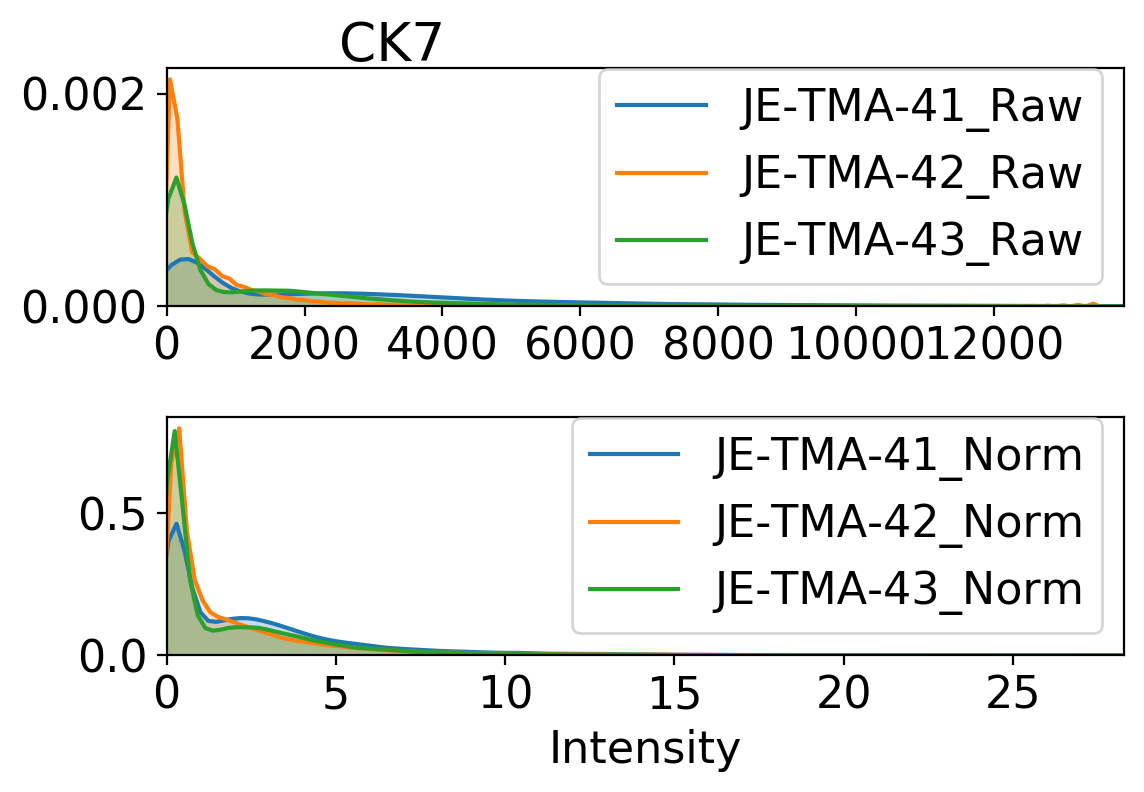

In [8]:
print(len(df_norm))
print(len(df_raw))
ls_marker = df_raw.columns[df_raw.dtypes == 'float64']

#use the histograms

for s_marker in ls_marker:
    fig,ax = plt.subplots(2,1,dpi=200)
    ax=ax.ravel()
    i_max = np.quantile(df_raw.loc[:,s_marker],.995)
    i_norm = np.quantile(df_norm.loc[:,ls_marker],.995)
    for s_slide in sorted(set(df_raw.slide)): 
        se_norm = df_norm[df_norm.slide==s_slide].loc[:,s_marker]
        se_norm.name = f"{s_slide}_Norm"
        se_raw = df_raw[df_raw.slide==s_slide].loc[:,s_marker]
        se_raw.name = f"{s_slide}_Raw"
        sns.kdeplot(se_norm,shade=True,ax=ax[1],clip=(0,i_norm),label=f"{s_slide}_Norm")                       
        sns.kdeplot(se_raw,shade=True,ax=ax[0],clip=(0,i_max),label=f"{s_slide}_Raw")
    ax[0].set_xlim(left=0,right=i_max)
    ax[1].set_xlim(left=0,right=i_norm)
    ax[0].set_xlabel(f'')
    ax[1].set_xlabel(f'Intensity')
    ax[0].legend()
    ax[1].legend()
    plt.suptitle(s_marker.split('_')[0],x=.35,y=1)
    plt.tight_layout()
    fig.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/RawvsNorm_JE-TMA_{s_marker}_kde.png')
    if s_marker != 'CK7_Ring':
        plt.close(fig)

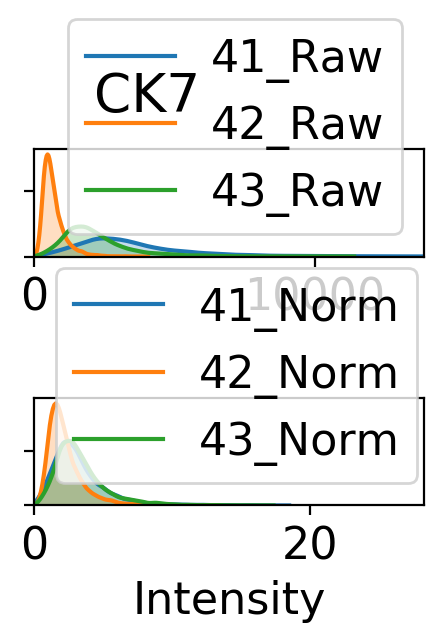

In [9]:
#scene9 histogram - the one shown in paper figure 3
ls_marker = df_raw.columns[df_raw.dtypes == 'float64']

#kde - scene 9
for s_marker in ls_marker:
    fig,ax = plt.subplots(2,1,dpi=200,figsize=(2.5,3))
    ax=ax.ravel()
    i_max = np.quantile(df_raw.loc[:,s_marker],.995)
    i_norm = np.quantile(df_norm.loc[:,ls_marker],.995)
    for s_slide in sorted(set(df_raw.slide)): 
        ls_index = df_raw[(df_raw.scene=='scene09') & (df_raw.slide==s_slide)].index
        se_norm = df_norm.loc[ls_index,s_marker]
        se_norm.name = f"{s_slide}_Norm"
        se_raw = df_raw.loc[ls_index,s_marker]
        se_raw.name = f"{s_slide}_Raw"
        sns.kdeplot(se_norm,shade=True,ax=ax[1],clip=(0,i_norm),label=f"{s_slide.split('TMA-')[1]}_Norm")                       
        sns.kdeplot(se_raw,shade=True,ax=ax[0],clip=(0,i_max),label=f"{s_slide.split('TMA-')[1]}_Raw")
    ax[0].set_xlim(left=0,right=i_max)
    ax[1].set_xlim(left=0,right=i_norm)
    ax[0].set_xlabel(f'')
    ax[1].set_xlabel(f'Intensity')
    ax[0].set_yticklabels(f'')
    ax[1].set_yticklabels(f'')
    ax[0].legend()
    ax[1].legend()
    plt.suptitle(s_marker.split('_')[0],x=.35,y=1)
    plt.tight_layout()
    fig.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/RawvsNorm_JE-TMA-Scene-09_{s_marker}_kde.png')
    if s_marker != 'CK7_Ring':
        plt.close(fig)

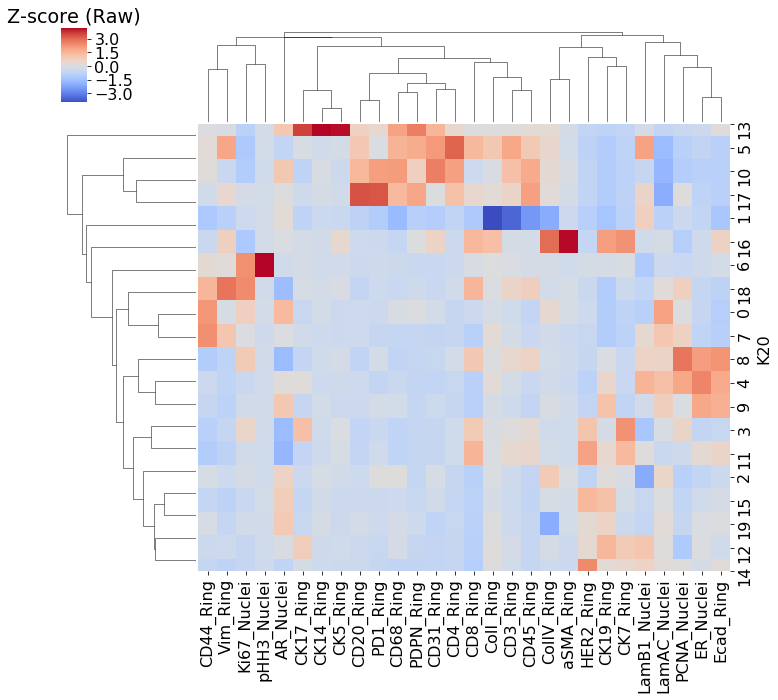

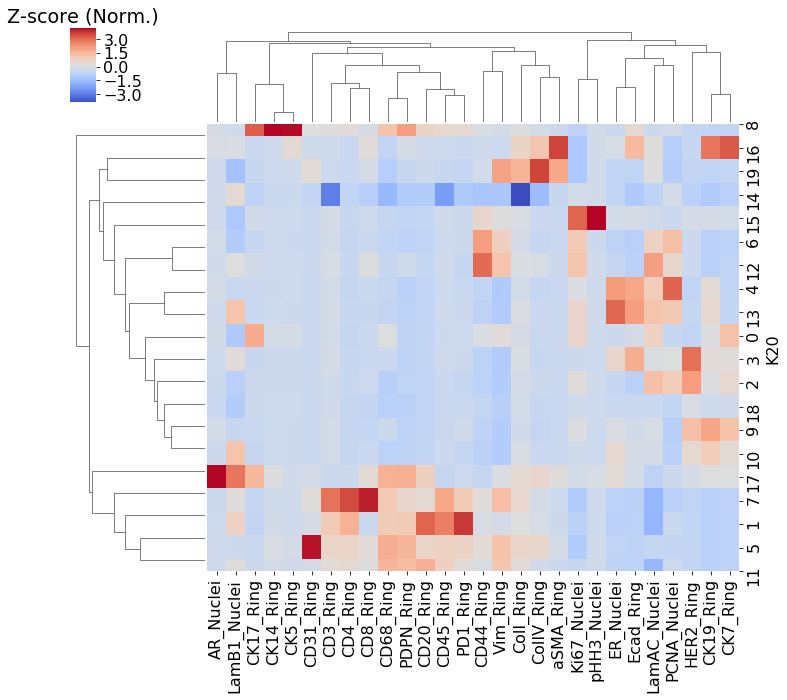

In [10]:
ls_marker = df_raw.columns[df_raw.dtypes == 'float64'].tolist()
k=20
s_markers = 'all'
ls_marker.append(f'K{k}')
g = sns.clustermap(df_raw.loc[:,ls_marker].groupby(f'K{k}').mean(),cmap='coolwarm',z_score=1,figsize=(12,10))
plt.title('Z-score (Raw)')
g.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/Raw_Kmeans{k}_{s_markers}.png')
g = sns.clustermap(df_norm.loc[:,ls_marker].groupby(f'K{k}').mean(),cmap='coolwarm',z_score=1,figsize=(12,10))
plt.title('Z-score (Norm.)')
g.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/Norm_Kmeans{k}_{s_markers}.png')

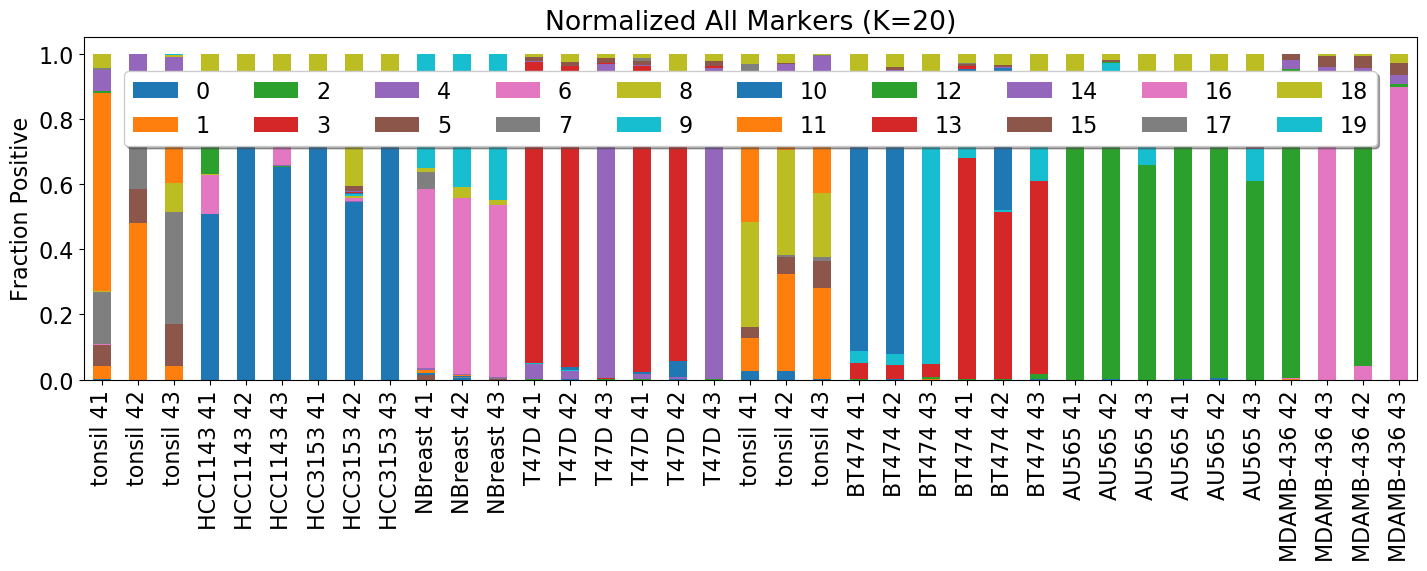

In [11]:
#stacked bar
#norm
k=20
s_markers='All'
df_xy_clust = df_xy.merge(df_norm.loc[:,[f'K{k}']],left_index=True,right_index=True)
#df_xy_clust = df_xy_clust[df_xy_clust.index.isin(df_cluster.index)]
df_prop = (df_xy_clust.groupby([f'K{k}','slide_scene']).DAPI_X.count())/(df_xy_clust.groupby(['slide_scene']).DAPI_X.count())
df_prop = df_prop.unstack().fillna(value=0).T
df_prop.index = [item.split('TMA-')[1] for item in df_prop.index]
df_prop.rename(d_je_tma,axis=0,inplace=True)
df_prop['slide'] =[item.split('_')[0] for item in df_prop.index]
df_prop['scene'] =[item.split('_')[1] for item in df_prop.index]
df_prop.index = [d_je_tma[item.split('_')[1]].split('_')[0] + ' ' + item.split('_')[0] for item in df_prop.index]
fig,ax=plt.subplots(figsize=(15,6),dpi=100)
df_prop.sort_values(['scene','slide']).plot(kind='bar',stacked=True,ax=ax,legend=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, .65),ncol=10, fancybox=True, shadow=True)
ax.set_ylabel('Fraction Positive')
ax.set_title(f'Normalized {s_markers} Markers (K={k})')
plt.tight_layout()
fig.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/Norm_{s_markers}markers_{k}Clusters_legend.png')


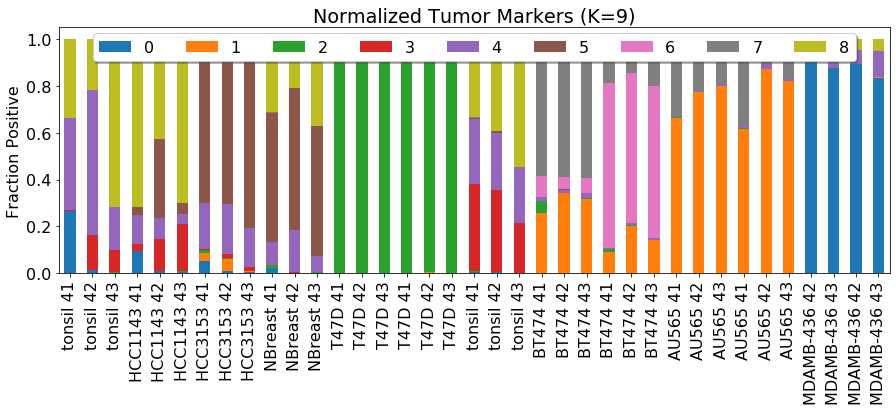

In [15]:
#stacked bar
#norm
k=9
s_markers='Tumor'
df_xy_clust = df_xy.merge(df_norm.loc[:,[f'K{k}']],left_index=True,right_index=True)
#df_xy_clust = df_xy_clust[df_xy_clust.index.isin(df_cluster.index)]
df_prop = (df_xy_clust.groupby([f'K{k}','slide_scene']).DAPI_X.count())/(df_xy_clust.groupby(['slide_scene']).DAPI_X.count())
df_prop = df_prop.unstack().fillna(value=0).T
df_prop.index = [item.split('TMA-')[1] for item in df_prop.index]
df_prop.rename(d_je_tma,axis=0,inplace=True)
df_prop['slide'] =[item.split('_')[0] for item in df_prop.index]
df_prop['scene'] =[item.split('_')[1] for item in df_prop.index]
df_prop.index = [d_je_tma[item.split('_')[1]].split('_')[0] + ' ' + item.split('_')[0] for item in df_prop.index]
fig,ax=plt.subplots(figsize=(13,6))
df_prop.sort_values(['scene','slide']).plot(kind='bar',stacked=True,ax=ax,legend=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, .83),ncol=10, fancybox=True, shadow=True)
ax.set_ylabel('Fraction Positive')
ax.set_title(f'Normalized {s_markers} Markers (K={k})')
plt.tight_layout()
fig.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/Norm_{s_markers}markers_{k}Clusters_legend.png')


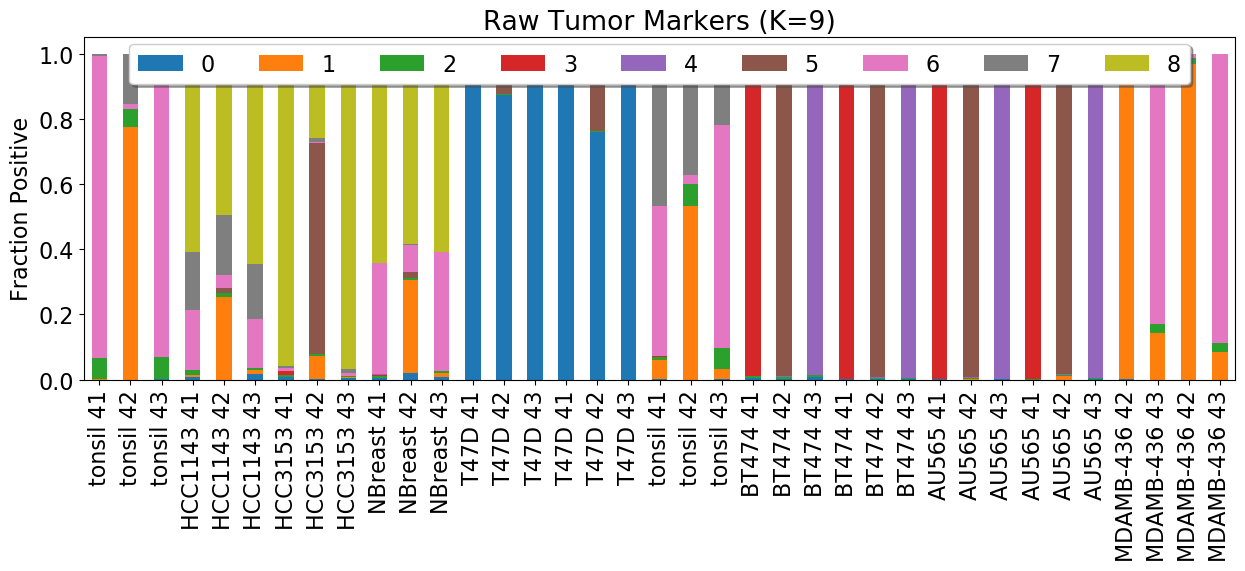

In [16]:
#stacked bar
#raw
k=9
s_markers='Tumor'
df_xy_clust = df_xy.merge(df_raw.loc[:,[f'K{k}']],left_index=True,right_index=True)
df_prop = (df_xy_clust.groupby([f'K{k}','slide_scene']).DAPI_X.count())/(df_xy_clust.groupby(['slide_scene']).DAPI_X.count())
df_prop = df_prop.unstack().fillna(value=0).T
df_prop.index = [item.split('TMA-')[1] for item in df_prop.index]
df_prop.rename(d_je_tma,axis=0,inplace=True)
df_prop['slide'] =[item.split('_')[0] for item in df_prop.index]
df_prop['scene'] =[item.split('_')[1] for item in df_prop.index]
df_prop.index = [d_je_tma[item.split('_')[1]].split('_')[0] + ' ' + item.split('_')[0] for item in df_prop.index]
fig,ax=plt.subplots(figsize=(13,6),dpi=100)
df_prop.sort_values(['scene','slide']).plot(kind='bar',stacked=True,ax=ax,legend=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, .83),ncol=10, fancybox=True, shadow=True)
ax.set_ylabel('Fraction Positive')
ax.set_title(f'Raw {s_markers} Markers (K={k})')
plt.tight_layout()
fig.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/Raw_{s_markers}markers_{k}Clusters_legend.png')


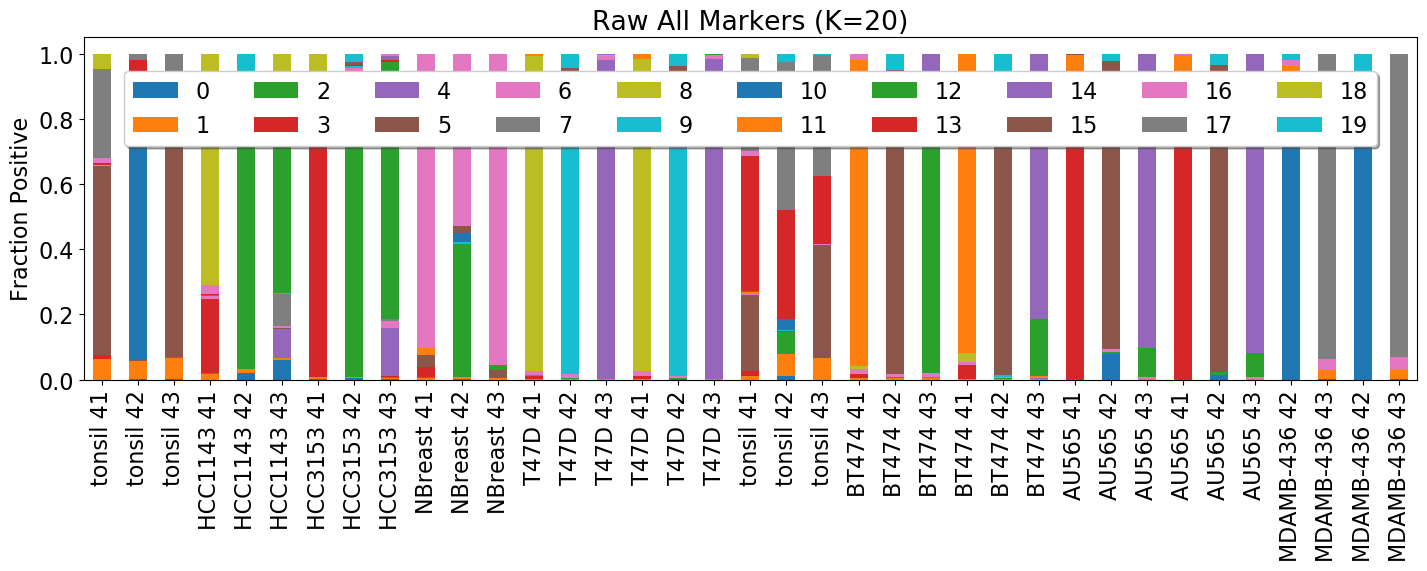

In [17]:
#stacked bar
#raw
k=20
s_markers='All'
df_xy_clust = df_xy.merge(df_raw.loc[:,[f'K{k}']],left_index=True,right_index=True)
df_prop = (df_xy_clust.groupby([f'K{k}','slide_scene']).DAPI_X.count())/(df_xy_clust.groupby(['slide_scene']).DAPI_X.count())
df_prop = df_prop.unstack().fillna(value=0).T
df_prop.index = [item.split('TMA-')[1] for item in df_prop.index]
df_prop.rename(d_je_tma,axis=0,inplace=True)
df_prop['slide'] =[item.split('_')[0] for item in df_prop.index]
df_prop['scene'] =[item.split('_')[1] for item in df_prop.index]
df_prop.index = [d_je_tma[item.split('_')[1]].split('_')[0] + ' ' + item.split('_')[0] for item in df_prop.index]
fig,ax=plt.subplots(figsize=(15,6),dpi=100)
df_prop.sort_values(['scene','slide']).plot(kind='bar',stacked=True,ax=ax,legend=True)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, .65),ncol=10, fancybox=True, shadow=True)
ax.set_ylabel('Fraction Positive')
ax.set_title(f'Raw {s_markers} Markers (K={k})')
plt.tight_layout()
fig.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/Raw_{s_markers}markers_{k}Clusters_legend.png')


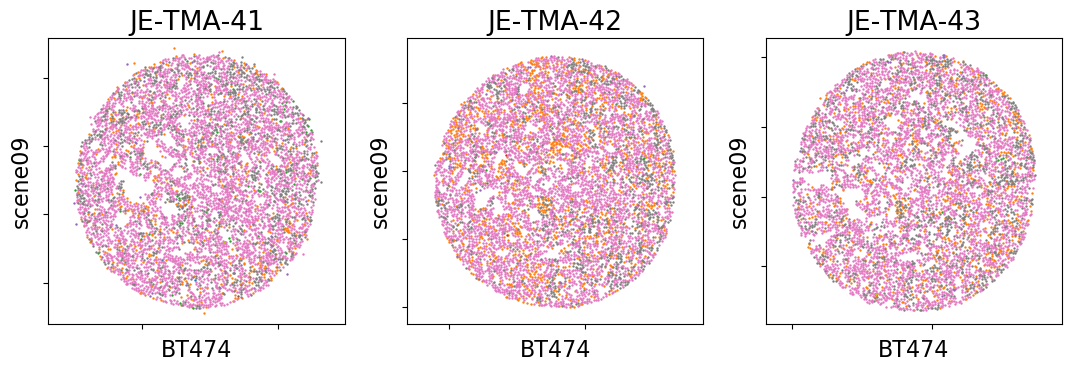

In [26]:
#plot all groups spatially    
df_mi = df_norm
for s_scene in sorted(set(df_mi.scene))[:-2]:
    #plot negative cells
    fig,ax = plt.subplots(1,3,figsize=(11,4),dpi=100) #,sharex=True,sharey=True
    ax=ax.ravel()
    for idx,s_sample in enumerate(sorted(set(df_mi.slide))):
        df_gray = df_xy[(df_xy.scene==s_scene) & (df_xy.slide==s_sample)]
        if len(df_gray)>=1:
            df_gray.plot.scatter(x='DAPI_X',y='DAPI_Y',color='white',s=2,label=f'',ax=ax[idx])
        for idxs, s_color in enumerate(list(set(df_mi.K9))):
            #print(s_color)
            df_color_pos_loc = df_xy[df_xy.index.isin((df_mi[df_mi.K9==s_color].index))]
            df_plot = df_color_pos_loc[(df_color_pos_loc.scene==s_scene) & (df_color_pos_loc.slide==s_sample)]
            if len(df_plot)>=1:
                sns.scatterplot(data=df_plot,x='DAPI_X',y='DAPI_Y',label=f'{s_color}',
                                                                    ax=ax[idx],
                                                                    legend=False,
                                                                    s=3,
                                                                    linewidth=0
                                                                    )
            else:
                sns.scatterplot(data=df_xy.iloc[0:2], x='DAPI_X',y='DAPI_Y',label=f'{s_color}',ax=ax[idx],legend=False,s=5,linewidth=0)

        ax[idx].axis('equal')
        ax[idx].set_ylim(bottom=df_gray.DAPI_Y.sort_values()[-20],top=df_gray.DAPI_Y.sort_values()[20])
        ax[idx].set_ylim(ax[idx].get_ylim()[::-1])
        ax[idx].set_xlim(left=df_gray.DAPI_X.sort_values()[-20],right=df_gray.DAPI_X.sort_values()[20])
        ax[idx].set_ylabel(s_scene)
        ax[idx].set_title(s_sample)
        ax[idx].set_xlabel(d_je_tma[s_scene].split('_')[0])
        ax[idx].set_yticklabels('')
        ax[idx].set_xticklabels('')
        ax[idx].legend('',frameon=False)
    plt.tight_layout()
    if s_scene == 'scene01':
        ax[0].legend(markerscale=5)
    fig.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/spatial_{s_scene}_kmeansK9_Norm_scatter.png')
    if s_scene != 'scene09':
        plt.close(fig)

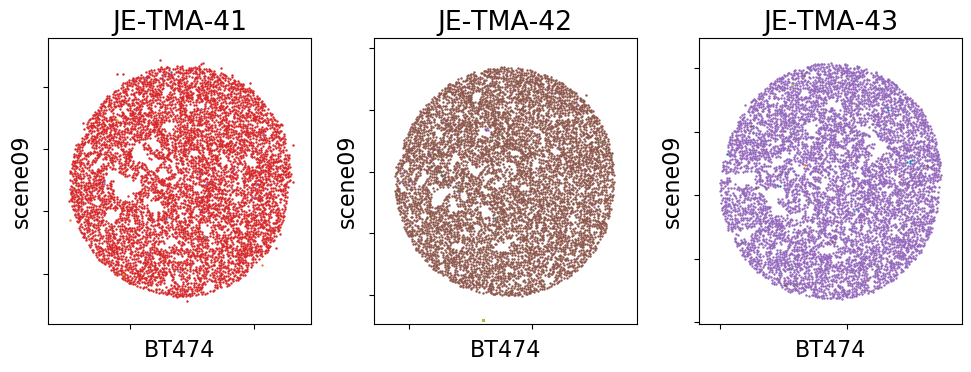

In [27]:
#plot all groups spatially    
df_mi = df_raw

for s_scene in sorted(set(df_mi.scene))[:-2]:
    fig,ax = plt.subplots(1,3,figsize=(10,4),dpi=100) #,sharex=True,sharey=True
    ax=ax.ravel()
    for idx,s_sample in enumerate(sorted(set(df_mi.slide))):
        df_gray = df_xy[(df_xy.scene==s_scene) & (df_xy.slide==s_sample)]
        if len(df_gray)>=1:
            df_gray.plot.scatter(x='DAPI_X',y='DAPI_Y',color='white',s=2,label=f'',ax=ax[idx])
        for idxs, s_color in enumerate(list(set(df_mi.K9))):
            #print(s_color)
            df_color_pos_loc = df_xy[df_xy.index.isin((df_mi[df_mi.K9==s_color].index))]
            df_plot = df_color_pos_loc[(df_color_pos_loc.scene==s_scene) & (df_color_pos_loc.slide==s_sample)]
            if len(df_plot)>=1:
                sns.scatterplot(data=df_plot,x='DAPI_X',y='DAPI_Y',label=f'{s_color}',
                                                                    ax=ax[idx],
                                                                    legend=False,
                                                                    s=3,
                                                                    linewidth=0
                                                                    )
            else:
                sns.scatterplot(data=df_xy.iloc[0:2], x='DAPI_X',y='DAPI_Y',label=f'{s_color}',ax=ax[idx],legend=False,s=5,linewidth=0)

        ax[idx].axis('equal')
        ax[idx].set_ylim(bottom=df_gray.DAPI_Y.sort_values()[-20],top=df_gray.DAPI_Y.sort_values()[20])
        ax[idx].set_ylim(ax[idx].get_ylim()[::-1])
        ax[idx].set_xlim(left=df_gray.DAPI_X.sort_values()[-20],right=df_gray.DAPI_X.sort_values()[20])
        ax[idx].set_ylabel(s_scene)
        ax[idx].set_title(s_sample)
        ax[idx].set_xlabel(d_je_tma[s_scene].split('_')[0])
        ax[idx].set_yticklabels('')
        ax[idx].set_xticklabels('')
        ax[idx].legend('',frameon=False)
    plt.tight_layout()
    if s_scene == 'scene01':
        ax[0].legend(markerscale=5)
    fig.savefig(f'{codedir}/Figures/JE-TMA-41-42-43/spatial_{s_scene}_kmeansK9_Raw_scatter.png')
    if s_scene != 'scene09':
        plt.close(fig)